In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from numpy import linalg
from matplotlib.image import imread

# Setting the directory

In [8]:
dataset_path = '/media/sysadm/SHIBAJEE/For upload/Shibajee/Assignments/Machine Learning/Bayes Classifier'
dataset_dir  = os.chdir(dataset_path)

# Reading the coordinates of the annotated random points

In [9]:
river_points = pd.read_csv("river_points.csv")
non_river_points = pd.read_csv("land_points.csv")

In [10]:
IMAGE = np.ndarray(shape = (512,512,4),dtype = np.int64)

for i in range(4):
    image = plt.imread('band'+ str(i+1)+'.gif')
    IMAGE[:,:,i] = np.array(image[:,:,0])

# Calculating the mean vector

In [11]:
ZIP_river = zip(list(river_points['column']), list(river_points['row']))
river_mu = [0, 0, 0, 0]
for i,j in ZIP_river:
    for k in range(4):
        river_mu[k] = river_mu[k] + IMAGE[i,j,k]
river_mu = np.array(river_mu)/50; river_mu
print("\n Mean vector of the river class is :-\n", river_mu)


 Mean vector of the river class is :-
 [41.   26.28 27.9  34.5 ]


In [12]:
ZIP_non_river = zip(list(non_river_points['column']), list(non_river_points['row']))
non_river_mu = [0, 0, 0, 0]
for i,j in ZIP_non_river:
    for k in range(4):
        non_river_mu[k] = non_river_mu[k] + IMAGE[i,j,k]
non_river_mu = np.array(non_river_mu)/150; non_river_mu
print("\n Mean vector of the non river class is :-\n", non_river_mu)


 Mean vector of the non river class is :-
 [40.58666667 25.78       26.62       33.7       ]


# Calculating the variance covariance matrix

In [13]:
A1 = np.ndarray(shape = (50, 4), dtype = np.float64)
for i in range(50):
    A1[i] = np.subtract(IMAGE[river_points['column'][i], river_points['column'][i], :], river_mu)

A2 = np.ndarray(shape = (150, 4), dtype = np.float64)
for i in range(150):
    A2[i] = np.subtract(IMAGE[non_river_points['column'][i], non_river_points['column'][i], :], non_river_mu)

In [14]:
river_cov = np.ndarray(shape = (4,4), dtype = np.float64)
non_river_cov = np.ndarray(shape = (4,4), dtype = np.float64)

for i in range(4):
    for j in range(4):
        river_cov[i][j] = np.dot(A1[:,i], A1[:,j])/50
print("\nCo-variance of the river class is :-\n", river_cov)


for i in range(4):
    for j in range(4):
        non_river_cov[i][j] = np.dot(A2[:,i], A2[:,j])/150
print("\nCo-variance of the non river class is :-\n", non_river_cov)


Co-variance of the river class is :-
 [[  4.6      4.176    3.88   -10.36  ]
 [  4.176    5.0872   5.2612 -11.8372]
 [  3.88     5.2612   7.922   -9.796 ]
 [-10.36   -11.8372  -9.796   61.25  ]]

Co-variance of the non river class is :-
 [[ 9.05031111  8.06506667 11.87786667  4.32346667]
 [ 8.06506667  8.11933333 11.45573333  6.41386667]
 [11.87786667 11.45573333 20.27986667  9.8748    ]
 [ 4.32346667  6.41386667  9.8748     46.85266667]]


# Calculating the inverse of variance covariance matrix


In [16]:
non_river_cov_inverse = linalg.inv(river_cov)

river_cov_inverse = linalg.inv(non_river_cov)

# Fitting the multinormal distribution to find the class conditional probabilities

In [17]:
def multinormal(i,j):
    river = np.subtract(IMAGE[i,j,:], river_mu)
    non_river = np.subtract(IMAGE[i,j,:], non_river_mu)
    
    river_class = np.dot(np.dot(river.T, river_cov_inverse), river)
    non_river_class = np.dot(np.dot(non_river.T , non_river_cov_inverse), non_river)
    
    det_river_cov = linalg.det(river_cov)
    det_non_river_cov = linalg.det(non_river_cov)
    
    p1 = (0.5) * 1/np.sqrt(det_river_cov) * np.exp(-river_class)
    p2 = (0.5) * 1/np.sqrt(det_non_river_cov) * np.exp(-non_river_class)

    return p1,p2


## Implementing the Bayes Classifier

In [18]:
def Bayes(P1,P2):
    image_output = np.ndarray(shape = (512,512), dtype = np.int64)
    for i in range(512):
        for j in range(512):
            p1, p2 = multinormal(i,j)
            if(P1*p1 > P2*p2):
                image_output[i,j] = 255
            else:
                image_output[i,j] = 0
    return image_output

# P1 = 0.5, P2 = 0.5

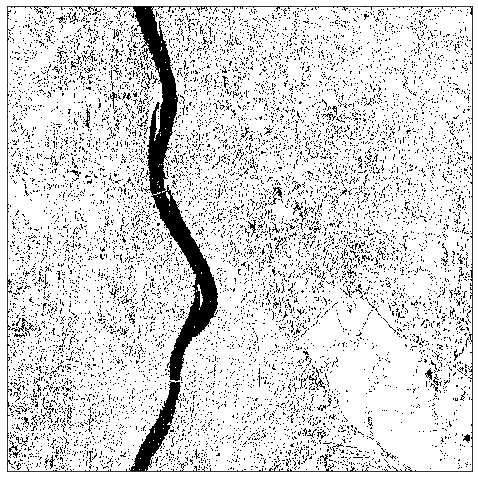

In [20]:
image1 = Bayes(0.5,0.5)
plt.subplot(1,1,1)
plt.imshow(image1, cmap='gray')
plt.tick_params(labelleft=False, labelbottom=False, bottom=False,top=False,right=False,left=False, which='both')
plt.subplots_adjust(right=1.2, top=2.5)
plt.show()

# P1 = 0.8, P2 = 0.2

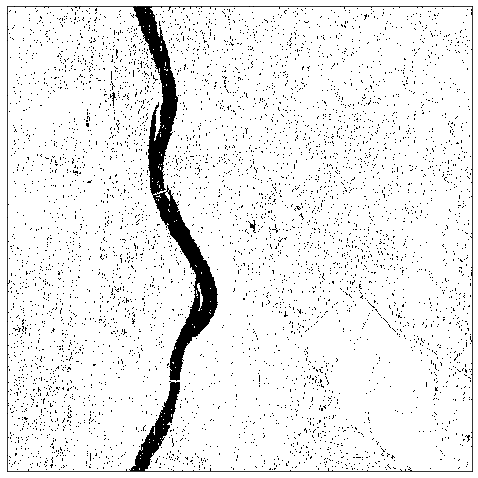

In [21]:
image2 = Bayes(0.8,0.2)
plt.subplot(1,1,1)
plt.imshow(image2, cmap='gray')
plt.tick_params(labelleft=False, labelbottom=False, bottom=False,top=False,right=False,left=False, which='both')
plt.subplots_adjust(right=1.2, top=2.5)
plt.show()

# P1 = 0.2, P2 = 0.8

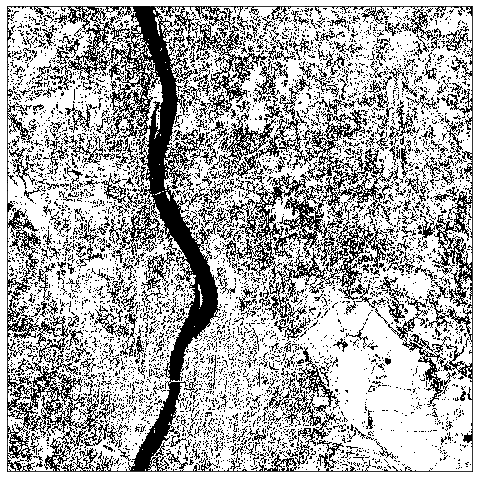

In [22]:
image3= Bayes(0.25,0.75)
plt.subplot(1,1,1)
plt.imshow(image3, cmap='gray')
plt.tick_params(labelleft=False, labelbottom=False, bottom=False,top=False,right=False,left=False, which='both')
plt.subplots_adjust(right=1.2, top=2.5)
plt.show()